# Лабораторная работа №2
## Рекурсия. Стратегия «разделяй и властвуй»

## 1
Реализуйте или найдите реализации двух сортировок: сортировка выбором и быстрая
сортировка. Проведите вычислительные эксперименты и нарисуйте графики,
показывающие зависимость времени выполнения двух алгоритмов от размера входных
данных. Рассмотрите три варианта входных данных:

1. Список случайных чисел
2. Отсортированный список
3. Отсортированный в обратную сторону список

Для каждого из вариантов должен быть свой график зависимости.

In [1]:
import random
import matplotlib.pyplot as plt
import timeit
import ipyturtle3 as turtle
import math
from random import shuffle
from copy import deepcopy

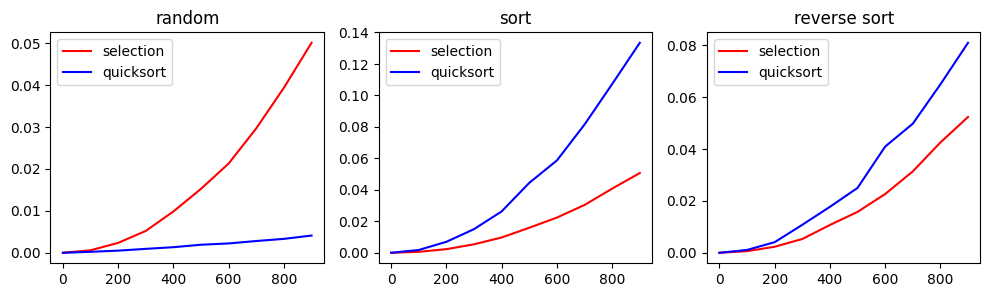

In [2]:
def selection_sort(arr):
    for i in range(len(arr)):
        minimum = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[minimum]:
                minimum = j
        arr[minimum], arr[i] = arr[i], arr[minimum]
    return arr

def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1

def quickSort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

def get_array(n, type_):
    if type_ == "random":
        return [random.randint(0, 100) for _ in range(n)]
    elif type_ == "sort":
        return [x for x in range(0, n, 1)]
    elif type_ == "reverse sort":
        return [x for x in range(n, 0, -1)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
time_selection = timeit.Timer("selection_sort(data)", globals=globals())
time_quicksort = timeit.Timer("quickSort(data, 0, len(data) - 1)", globals=globals())
n = []
time_S = []
time_Q = []
tasks = ["random", "sort", "reverse sort"]

for i in range(3):
    for j in range(0, 1000, 100):
        data = get_array(j, tasks[i])
        n.append(j)
        temp_time_S = time_selection.timeit(number=1)
        data = get_array(j, tasks[i])
        temp_time_Q = time_quicksort.timeit(number=1)
        time_S.append(temp_time_S)
        time_Q.append(temp_time_Q)
    ax = axes[i]
    ax.set_title(tasks[i])
    ax.plot(n, time_S, color="red")
    ax.plot(n, time_Q, color="blue")
    ax.legend(["selection", "quicksort"])
    n.clear()
    time_S.clear()
    time_Q.clear()

plt.show()

## 2
Ряд Трибоначчи начинается с тройки 0, 0, 1, а каждое следующее число равно сумме
трёх предыдущих. Числа нумеруются с 0. Напишите функцию tribonacci(n), которая
принимает в себя номер числа и возвращает n-ое число Трибоначчи. Функция должна быть
рекурсивной. При решении данной задачи не используйте циклы.
Укажите базовый и рекурсивный случаи вашего алгоритма.

In [3]:
def trib(n):
    if (n == 2):
        return 1
    elif (n < 2):
        return 0
    else:
        return trib(n - 1) + trib(n - 2) + trib(n - 3)
    
print(trib(2))

1


Базовый при n <= 2 

Рекурсивный при n > 2

## 3
Хорошим примером для иллюстрации рекурсивных алгоритмов являются задачи
рисования фракталов. Далее представлена программа, которая при помощи модуля turtle
(turtle — Turtle graphics — Python 3.9.7 documentation) рисует фрактальное дерево.
Запустите программу и разберитесь в ее коде. Попробуйте поменять параметры при вызове
функции tree и внутри нее.
Последовательно измените программу для рисования рекурсивного дерева по следующим
пунктам:

1. Измените толщину ветвей, чтобы при уменьшении branchLen линии становились
тоньше.

In [4]:
myCanvas=turtle.Canvas(width=400,height=400)
display(myCanvas)
myTS=turtle.TurtleScreen(myCanvas)
myTS.clear()
myTS.bgcolor("black")
t=turtle.Turtle(myTS)
t.shape("turtle")
t.speed(0)

def tree(branchLen, t):
    if branchLen > 5:
        t.width(branchLen / 50)
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - 15, t)
        t.left(40)
        tree(branchLen - 15, t)
        t.right(20)
        t.backward(branchLen)

t.hideturtle()
t.left(90)
t.up()
t.backward(100)
t.down()
t.color("white")
tree(75, t)

Canvas(height=400, width=400)

### <center>Результат</center>

![](img/1.png)

2. Измените цвет ветвей таким образом, чтобы самые короткие ветви окрашивались
как листья.

In [5]:
myCanvas=turtle.Canvas(width=400,height=400)
display(myCanvas)
myTS=turtle.TurtleScreen(myCanvas)
myTS.clear()
myTS.bgcolor("black")
t=turtle.Turtle(myTS)
t.shape("turtle")
t.speed(0)

def tree(branchLen, t):
    if branchLen > 5:
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - 15, t)
        t.left(40)
        tree(branchLen - 15, t)
        t.right(20)
        t.color("white")
        if branchLen == 15:
            t.color("red")
        t.backward(branchLen)
        

t.hideturtle()
t.left(90)
t.up()
t.backward(100)
t.down()
t.color("white")
tree(75, t)

Canvas(height=400, width=400)

### <center>Результат</center>

![](img/2.png)

3. Измените угол поворота черепахи, чтобы каждая ветвь поворачивалась
произвольным образом в некотором диапазоне. Например, выбирайте угол между
15-ю и 45-ю градусами. Поэкспрериментируйте в поисках лучшего вида.

In [13]:
myCanvas=turtle.Canvas(width=500,height=500)
display(myCanvas)
myTS=turtle.TurtleScreen(myCanvas)
myTS.clear()
myTS.bgcolor("black")
t=turtle.Turtle(myTS)
t.shape("turtle")
t.speed(0)

def tree(branchLen, t):
    if branchLen > 5:
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - 15, t)
        t.left(40)
        tree(branchLen - 15, t)
        t.right(20)
        t.backward(branchLen)
        
        

t.hideturtle()
t.color("white")
tree(75, t)

Canvas(width=500)

### <center>Результат</center>

![](img/3.png)

4. Измените рекурсивную часть branchLen, чтобы каждый раз вычиталось
произвольное значение из некоторого диапазона вместо некой постоянной
величины.

In [7]:
myCanvas=turtle.Canvas(width=600,height=600)
display(myCanvas)
myTS=turtle.TurtleScreen(myCanvas)
myTS.clear()
myTS.bgcolor("black")
t=turtle.Turtle(myTS)
t.shape("turtle")
t.speed(0)

def tree(branchLen, t):
    if branchLen > 5:
        d = random.randint(0, 20)
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - d, t)
        t.left(40)
        tree(branchLen - d, t)
        t.right(20)
        t.backward(branchLen)

t.hideturtle()
t.left(90)
t.up()
t.backward(100)
t.down()
t.color("white")
tree(75, t)

Canvas(height=600, width=600)

### <center>Результат</center>

![](img/4.png)

## 4
При помощи модуля turtle нарисуйте фрактал, указанный в вашем варианте.

Вариант 4. Кривая дракона

In [8]:
myCanvas=turtle.Canvas(width=600,height=600)
display(myCanvas)
myTS=turtle.TurtleScreen(myCanvas)
myTS.clear()
t=turtle.Turtle(myTS)
t.shape("turtle")
t.speed(0)
t.hideturtle()

def dragon(level, n):
    if n == 10:
        return level
    newlevel = ''
    for i in level:
        if i == '+':
            newlevel = newlevel + '+'
        elif i == '-':
            newlevel = newlevel + '-'
        elif i == 'F':
            newlevel = newlevel + 'F'
        elif i == 'X':
            newlevel = newlevel + 'X+YF+'
        elif i == 'Y':
            newlevel = newlevel + '-FX-Y'
    level = newlevel
    return dragon(level, n + 1)
    
way = dragon('FX', 1)

for i in way:
    if i == '-':
        t.left(90)
    elif i == '+':
        t.right(90)
    else:
        t.fd(3) 

Canvas(height=600, width=600)

### <center>Результат</center>

![](img/5.png)

## 5
Найдите или придумайте алгоритм для рисования фрактальных гор. Подсказка: одним
из возможных методов будет использование треугольников.

In [9]:
myCanvas=turtle.Canvas(width=1000,height=1000)
display(myCanvas)
myTS=turtle.TurtleScreen(myCanvas)
myTS.clear()
t =turtle.Turtle(myTS)
t.hideturtle()
t.speed(0)

def gen(n):
    if n > 500:
        return
    t.fd(n)
    t.left(120)
    t.fd(n)
    t.left(120)
    t.fd(n / 4)
    t.left(120)
    t.fd(n / 4)
    t.left(120)
    t.fd(n / 4)
    t.left(120)
    t.fd(n)
    t.left(120)
    t.fd(n)
    gen(n * 1.5)

t.up()
t.goto(-500, -500)
t.down()
gen(10)

Canvas(height=1000, width=1000)

### <center>Результат</center>

![](img/6.png)

## 6
Решите рекурсивно мини-судоку размером 4x4. Для этого напишите функцию
solve_sudoku(matrix), где matrix - целочисленная матрица (список списков).
![](img/7.png)
В мини-судоку числа от 1 до 4 встречаются ровно один раз в каждой вертикали и
горизонтали, а также в квадратах 2x2.
Укажите базовый и рекурсивный случаи вашего алгоритма.
Судоку представлено в виде таблицы чисел, в которой нулями обозначены пустые
места:
0000
0020
0100
3004
Правильный ответ:
2341
1423
4132
3214

In [10]:
def make_assumptions(sudoku):
    for i, row in enumerate(sudoku):
        for j, value in enumerate(row):
            if not value:
                values = set(row) \
                    | set([sudoku[k][j] for k in range(4)]) \
                    | set([sudoku[m][n] for m in range((i // 2) * 2, (i // 2) * 2 + 2) 
                           for n in range((j // 2) * 2, (j // 2) * 2 + 2)])
                yield i, j, list(set(range(1, 5)) - values)
                
                
def solve_sudoku(sudoku):
    if all([k for row in sudoku for k in row]):
        return sudoku
    assumptions = list(make_assumptions(sudoku))
    shuffle(assumptions)
 
    x, y, values = min(assumptions, key=lambda x: len(x[2]))
 
    for v in values:
        new_sudoku = deepcopy(sudoku)
        new_sudoku[x][y] = v
        s = solve_sudoku(new_sudoku)
        if s:
            return s
    return None

print(*solve_sudoku([[0, 0, 0, 0],[0, 0, 2, 0],[0, 1, 0, 0],[3, 0, 0, 4]]))

[2, 3, 4, 1] [1, 4, 2, 3] [4, 1, 3, 2] [3, 2, 1, 4]
